In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import time
import json

# import pandas 
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# import datetime
import datetime


In [2]:
# create executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [3]:
# give site time to load before scraping
time.sleep(3)

In [4]:
# scrape the table
table = soup(browser.html, 'html.parser').find('table', class_='table')

In [5]:
# finished scraping, close webpage
browser.quit()

In [6]:
# initialize list to hold dictionaries of row data
data = []

# create lists for headers (dict keys) and rows (dict values)
header = table.find_all('th')
rows = table.find_all('tr')

# delete header row from rows
del rows[0]

# populate data dictionary
for j in range(len(rows)):
    # assign row
    row = rows[j].find_all('td')
    # initialize dictionary to store row data
    row_dict={}

    # populate dictionary for row data
    for i in range(len(header)):
        key = header[i].text
        value = row[i].text
        row_dict[key]=value
    data.append(row_dict)

df=pd.DataFrame(data)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# change data types
df=df.astype({'id':int, 'sol':int, 'ls':int,'month':int,'min_temp':float,'pressure':float})
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
df.to_csv('mars_weather.csv',index=False)

In [9]:
# Question: How many Martian months exist?
print(f'There are {len(df["month"].unique())} months on Mars.')

There are 12 months on Mars.


In [10]:
# Question: How many Martian days were observed?
print(f'There are {len(df["sol"].unique())} dates observed in the dataset.')

There are 1867 dates observed in the dataset.


Text(0.5, 1.0, 'Atmospheric Temperature on Mars by Month')

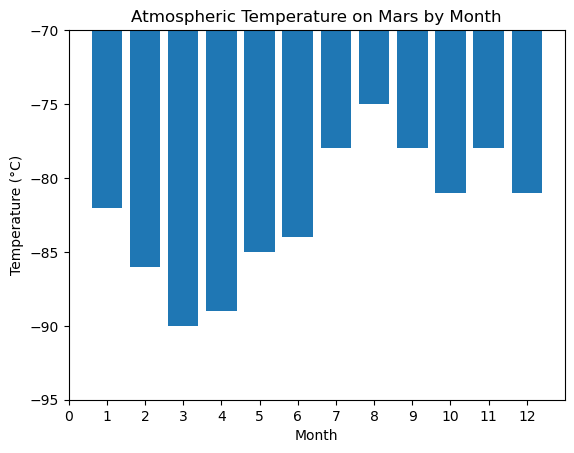

In [11]:
# Question: What are the coldest and warmest months on Mars?
plt.bar(df['month'],df['min_temp'])
plt.xticks(range(13))
plt.ylim(-95,-70)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Atmospheric Temperature on Mars by Month')

The third month on Mars is the coldest. The eigth month on Mars is the warmest

Text(0.5, 1.0, 'Atmospheric Pressure on Mars by Month')

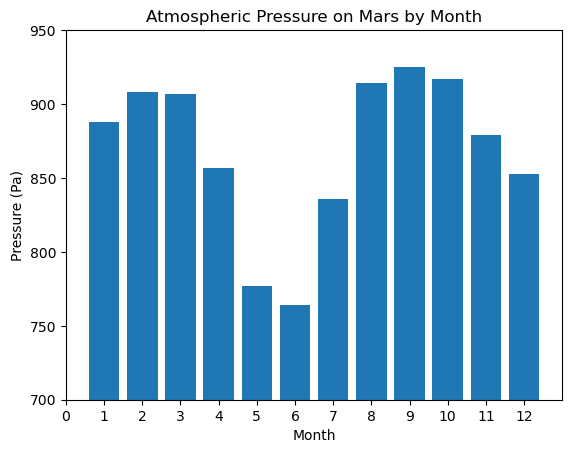

In [12]:
# df[['month','pressure']].groupby(['month']).mean()
plt.bar(df['month'],df['pressure'])
plt.xticks(range(13))
plt.ylim(700,950)
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.title('Atmospheric Pressure on Mars by Month')

The sixth month on Mars has the lowest pressure. The ninth month on Mars has the highest pressure

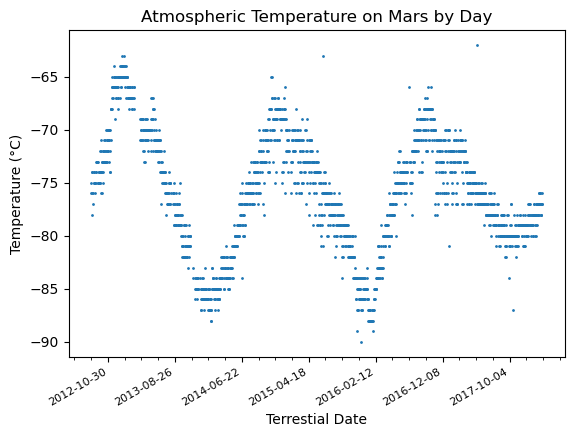

In [13]:
plt.scatter(x=df['terrestrial_date'],y=df['min_temp'],s=1)
plt.xlabel('Terrestial Date')
plt.ylabel('Temperature (°C)')
plt.title('Atmospheric Temperature on Mars by Day')

ax = plt.gca()

# change tick frequency and formatting
ax.xaxis.set_major_locator(mdates.DayLocator(interval=300))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_tick_params(labelsize=8)
plt.gcf().autofmt_xdate()
plt.show()

On the chart, it appears to take about 650-670 terrestial days to complete one sine cycle (2012-08-30 to about 2014-06-30, 2014-06-30 to about 2016-03-15 ). By this estimation, one solar year on Mars is about 660 days.